## Hurricane Harvey Data Around Houston
Galveston Bay citizens run their own water monitoring:
<br>http://gulfcitizenscience.org/gbf_db

#### Here's some support links on datetimes in pandas.
http://strftime.org/
<br>https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Section 1: Galveston Bay Data

In [2]:
bay_data_germs = (pd.read_csv("Galveston Bay Foundation Data_20190516.csv")
                  .dropna(how='any') # only keep with enterococcus readings (also keeps highest-quality data)
                  .reset_index(inplace = False, drop = True))
bay_data_germs.head(4)

,Date,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus
0,7/19/2018 10:03 am,Galveston Bay at Shoreacres Pier,27.0,28.0,5.6,8.0,14.10,1.0
1,7/18/2018 8:30 am,Jones Bay at Bayou Vista,28.0,29.5,3.4,8.0,23.60,20.0
2,7/18/2018 8:12 am,Jones Bay at Tiki Tom's RV Park,28.0,28.5,4.0,8.0,28.60,10.0
3,7/17/2018 8:00 am,Clear Lake at Watergate Yachting Center,27.0,29.0,3.8,8.6,10.95,1.0


In [3]:
bay_data_germs['Date'] =  pd.to_datetime(bay_data_germs['Date'])
bay_data_germs['Year'] = bay_data_germs['Date'].dt.year
bay_data_germs['Month'] = bay_data_germs['Date'].dt.month
bay_data_germs['Day'] = bay_data_germs['Date'].dt.day
bay_data_germs['Decimal_Date'] = (bay_data_germs['Year'] + 
                                  bay_data_germs['Month'] / 12 + 
                                  bay_data_germs['Day'] / 365)
bay_data_germs = bay_data_germs[['Area', 'Air Temp (°C)', 'Water Temp (°C)', 'Dissolved Oxygen (mg/L)', 
                                 'pH', 'Salinity (ppt)', 'Enterococcus', 'Decimal_Date']]
bay_data_germs.head(4)

,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus,Decimal_Date
0,Galveston Bay at Shoreacres Pier,27.0,28.0,5.6,8.0,14.10,1.0,2018.635388
1,Jones Bay at Bayou Vista,28.0,29.5,3.4,8.0,23.60,20.0,2018.632648
2,Jones Bay at Tiki Tom's RV Park,28.0,28.5,4.0,8.0,28.60,10.0,2018.632648
3,Clear Lake at Watergate Yachting Center,27.0,29.0,3.8,8.6,10.95,1.0,2018.629909


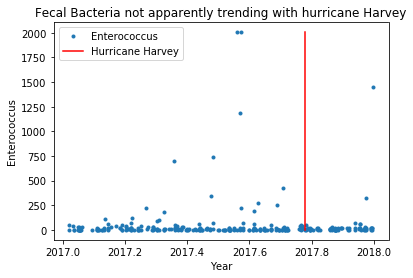

In [4]:
plt.plot(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Decimal_Date'],
         bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Enterococcus'], 
         label = 'Enterococcus',
         linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                                       (bay_data_germs['Decimal_Date'] < 2018.0)]['Enterococcus'])],
         label = 'Hurricane Harvey',
         linestyle = '-', color = 'r')
plt.xlabel('Year')
plt.ylabel('Enterococcus')
plt.title('Fecal Bacteria not apparently trending with hurricane Harvey')
plt.legend()
plt.show()

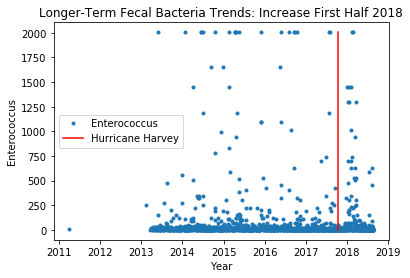

In [5]:
plt.plot(bay_data_germs['Decimal_Date'], 
         bay_data_germs['Enterococcus'], 
         label = 'Enterococcus',
         linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                                       (bay_data_germs['Decimal_Date'] < 2018.0)]['Enterococcus'])],
         label = 'Hurricane Harvey',
         linestyle = '-', color = 'r')
plt.xlabel('Year')
plt.ylabel('Enterococcus')
plt.title('Longer-Term Fecal Bacteria Trends: Increase First Half 2018')
plt.legend()
plt.show()

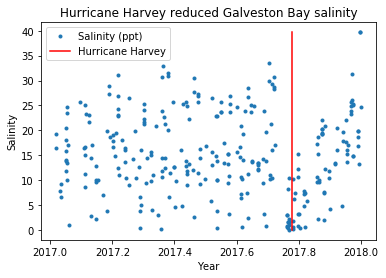

In [6]:
plt.plot(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Decimal_Date'],
         bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Salinity (ppt)'], 
         label = 'Salinity (ppt)',
         linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) &
                                       (bay_data_germs['Decimal_Date'] < 2018.0)]['Salinity (ppt)'])],
         label = 'Hurricane Harvey',
         linestyle = '-', color = 'r')
plt.xlabel('Year')
plt.ylabel('Salinity')
plt.title('Hurricane Harvey reduced Galveston Bay salinity')
plt.legend()
plt.show()

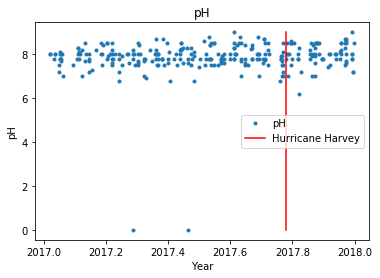

In [7]:
plt.plot(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Decimal_Date'], 
         bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['pH'], 
         label = 'pH',
         linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) &
                                       (bay_data_germs['Decimal_Date'] < 2018.0)]['pH'])],
         label = 'Hurricane Harvey',
         linestyle = '-', color = 'r')
plt.xlabel('Year')
plt.ylabel('pH')
plt.title('pH')
plt.legend()
plt.show()

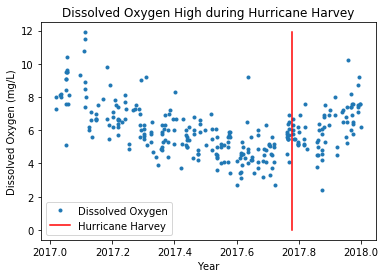

In [8]:
plt.plot(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Decimal_Date'], 
         bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Dissolved Oxygen (mg/L)'], 
         label = 'Dissolved Oxygen',
         linestyle = 'None', marker = '.')
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) &
                                       (bay_data_germs['Decimal_Date'] < 2018.0)]['Dissolved Oxygen (mg/L)'])],
         label = 'Hurricane Harvey',
         linestyle = '-', color = 'r')
plt.xlabel('Year')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.title('Dissolved Oxygen High during Hurricane Harvey')
plt.legend()
plt.show()

Dissolved oxygen trends with seasonal temperatures.
<br>Gas solubility in liquid decreases with temperature increase (Henry's law).

## Section 2: Add rainfall data from Houston Hobby Airport
PRCP documentation
<br>https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

In [9]:
rain_data = pd.read_csv('hobby weather 1.csv')
rain_data['week_rolling_avg_PRCP'] = rain_data['PRCP'].rolling(window = 7,
                                                               min_periods = 1).mean()
 
rain_data.head(3)

,STATION,NAME,DATE,PRCP,week_rolling_avg_PRCP
0,USW00012918,"HOUSTON WILLIAM P HOBBY AIRPORT, TX US",2008-01-01,0.0,0.0
1,USW00012918,"HOUSTON WILLIAM P HOBBY AIRPORT, TX US",2008-01-02,0.0,0.0
2,USW00012918,"HOUSTON WILLIAM P HOBBY AIRPORT, TX US",2008-01-03,0.0,0.0


In [10]:
np.max(rain_data['PRCP'])

12.07

In [11]:
rain_data = rain_data[['DATE', 'PRCP', 'week_rolling_avg_PRCP']]
rain_data['DATE'] = pd.to_datetime(rain_data['DATE'])

rain_data['Year'] = rain_data['DATE'].dt.year
rain_data['Month'] = rain_data['DATE'].dt.month
rain_data['Day'] = rain_data['DATE'].dt.day
rain_data['Decimal_Date'] = rain_data['Year'] + rain_data['Month'] / 12 + rain_data['Day'] / 365
rain_data = rain_data[['Decimal_Date', 'PRCP', 'week_rolling_avg_PRCP']]

rain_data.head(4)

,Decimal_Date,PRCP,week_rolling_avg_PRCP
0,2008.086073,0.0,0.0
1,2008.088813,0.0,0.0
2,2008.091553,0.0,0.0
3,2008.094292,0.0,0.0


In [12]:
bay_data_germs = bay_data_germs.join(rain_data.set_index('Decimal_Date'), on = 'Decimal_Date')
bay_data_germs.head(4)

,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus,Decimal_Date,PRCP,week_rolling_avg_PRCP
0,Galveston Bay at Shoreacres Pier,27.0,28.0,5.6,8.0,14.10,1.0,2018.635388,0.0,0.0
1,Jones Bay at Bayou Vista,28.0,29.5,3.4,8.0,23.60,20.0,2018.632648,0.0,0.0
2,Jones Bay at Tiki Tom's RV Park,28.0,28.5,4.0,8.0,28.60,10.0,2018.632648,0.0,0.0
3,Clear Lake at Watergate Yachting Center,27.0,29.0,3.8,8.6,10.95,1.0,2018.629909,0.0,0.0


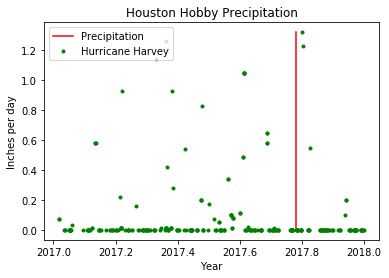

In [13]:
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) &
                                       (bay_data_germs['Decimal_Date'] < 2018.0)]['PRCP'])],
         linestyle = '-', color = 'r',
        label = 'Precipitation')
plt.plot(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Decimal_Date'],
         bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['PRCP'],
        linestyle = 'None', marker = '.', color = 'g',
        label = 'Hurricane Harvey')
plt.xlabel('Year')
plt.ylabel('Inches per day')
plt.title('Houston Hobby Precipitation not Catching Hurricane Harvey')
plt.legend()
plt.show()

#### Does a weekly average feature better expose precipitation around Hurricane Harvey?

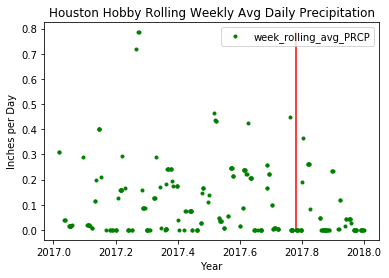

In [14]:
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                                       (bay_data_germs['Decimal_Date'] < 2018.0)]['week_rolling_avg_PRCP'])],
         linestyle = '-', color = 'r')
plt.plot(bay_data_germs.loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
                            (bay_data_germs['Decimal_Date'] < 2018.0)]['Decimal_Date'],
         (bay_data_germs
          .loc[(bay_data_germs['Decimal_Date'] >= 2017.0) & 
               (bay_data_germs['Decimal_Date'] < 2018.0)]
          ['week_rolling_avg_PRCP']),
        linestyle = 'None', marker = '.', color = 'g')
plt.xlabel('Year')
plt.ylabel('Inches per Day')
plt.title('Houston Hobby Rolling Weekly Avg Daily Precipitation')
plt.legend()
plt.show()

## Section 3: Buffalo Bayou water levels
Data source:
<br>https://waterdata.usgs.gov/usa/nwis/uv?site_no=08073700
<br>TS   parameter     Description
<br>        140428       00060     Discharge, cubic feet per second
<br>        140429       00065     Gage height, feet, [Primary Sensor]

Support link: groupby's in pandas
<br>https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [15]:
### get the bay data for a northern location in the bay
bay_data_buff_bayou = (pd.read_csv("Galveston Bay Foundation Data_20190516.csv")
                       .reset_index(inplace = False, drop = True))
bay_data_buff_bayou.head(4)

,Date,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus
0,7/25/2018 12:24 pm,Clear Lake at Marina Del Sol,32.0,31.0,6.1,8.5,12.4,NaN
1,7/25/2018 8:55 am,Galveston Bay at Bayshore Park,29.5,27.5,4.1,8.3,16.5,NaN
2,7/25/2018 8:55 am,Galveston Bay at Bayshore Park,29.5,27.5,4.1,8.3,16.5,NaN
3,7/20/2018 4:55 pm,Clear Lake at Nassau Bay Upper Bay Road,38.0,34.0,9.6,8.7,5.2,NaN


In [16]:
#sorted(list(bay_data_buff_bayou['Area'].unique()))

In [17]:
bay_data_buff_bayou['Date'] =  pd.to_datetime(bay_data_buff_bayou['Date'])
bay_data_buff_bayou['Year'] = bay_data_buff_bayou['Date'].dt.year
bay_data_buff_bayou['Month'] = bay_data_buff_bayou['Date'].dt.month
bay_data_buff_bayou['Day'] = bay_data_buff_bayou['Date'].dt.day
bay_data_buff_bayou['Decimal_Date'] = (bay_data_buff_bayou['Year'] + 
                                       bay_data_buff_bayou['Month'] / 12 + 
                                       bay_data_buff_bayou['Day'] / 365)
bay_data_buff_bayou = bay_data_buff_bayou[['Area', 'Air Temp (°C)', 'Water Temp (°C)', 'Dissolved Oxygen (mg/L)', 
                                           'pH', 'Salinity (ppt)', 'Enterococcus', 'Decimal_Date']]
bay_data_buff_bayou.head(4)

,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus,Decimal_Date
0,Clear Lake at Marina Del Sol,32.0,31.0,6.1,8.5,12.4,NaN,2018.651826
1,Galveston Bay at Bayshore Park,29.5,27.5,4.1,8.3,16.5,NaN,2018.651826
2,Galveston Bay at Bayshore Park,29.5,27.5,4.1,8.3,16.5,NaN,2018.651826
3,Clear Lake at Nassau Bay Upper Bay Road,38.0,34.0,9.6,8.7,5.2,NaN,2018.638128


Remove bay samples far from buffalo bayou:

In [18]:
bay_data_buff_bayou = (bay_data_buff_bayou[bay_data_buff_bayou['Area']
                                           .str.contains("Christmas|East Bay|\
                                                         Eckert|Jones|West Bay|Trinity|Anahuac|\
                                                         Highland Bayou|Offatt|\
                                                         Swan")==False])
bay_data_buff_bayou = (bay_data_buff_bayou[bay_data_buff_bayou['Area']
                                           .str.contains("Highland Bayou|Offatt|Swan Lake")==False])
#sorted(list(bay_data_buff_bayou['Area'].unique()))

In [19]:
buff_bayou = pd.read_csv('buffalo bayou 1.txt', sep = '\t', skiprows = [1])
buff_bayou.rename(columns={'140428_00060': 'Discharge_cfpd', '140429_00065': 'Gage_ht_ft'}, inplace=True)

buff_bayou['datetime'] = pd.to_datetime(buff_bayou['datetime'])

buff_bayou['Year'] = buff_bayou['datetime'].dt.year
buff_bayou['Month'] = buff_bayou['datetime'].dt.month
buff_bayou['Day'] = buff_bayou['datetime'].dt.day
buff_bayou['Decimal_Date'] = buff_bayou['Year'] + buff_bayou['Month'] / 12 + buff_bayou['Day'] / 365

buff_bayou = buff_bayou[['Decimal_Date', 'Discharge_cfpd', 'Gage_ht_ft']]

buff_bayou = buff_bayou.groupby('Decimal_Date')[['Discharge_cfpd', 'Gage_ht_ft']].mean()

buff_bayou.head(4)

,Discharge_cfpd,Gage_ht_ft
Decimal_Date,,
2009.086073,94.188542,28.486250
2009.088813,91.780208,28.454583
2009.091553,88.593750,28.412292
2009.094292,87.441667,28.396146


In [20]:
bay_data_buff_bayou = bay_data_buff_bayou.join(buff_bayou, on = 'Decimal_Date')
bay_data_buff_bayou.head(4)

,Area,Air Temp (°C),Water Temp (°C),Dissolved Oxygen (mg/L),pH,Salinity (ppt),Enterococcus,Decimal_Date,Discharge_cfpd,Gage_ht_ft
0,Clear Lake at Marina Del Sol,32.0,31.0,6.1,8.5,12.4,NaN,2018.651826,96.297917,28.021042
1,Galveston Bay at Bayshore Park,29.5,27.5,4.1,8.3,16.5,NaN,2018.651826,96.297917,28.021042
2,Galveston Bay at Bayshore Park,29.5,27.5,4.1,8.3,16.5,NaN,2018.651826,96.297917,28.021042
3,Clear Lake at Nassau Bay Upper Bay Road,38.0,34.0,9.6,8.7,5.2,NaN,2018.638128,108.083333,28.157500


#### Buffalo Bayou gauge does a good job of capturing Hurricane Harvey.

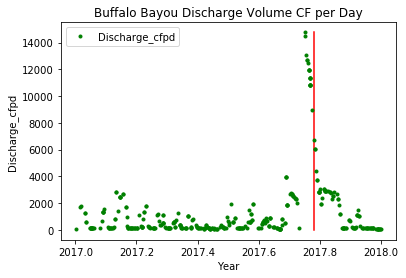

In [21]:
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_buff_bayou.loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
                                            (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]['Discharge_cfpd'])],
         linestyle = '-', color = 'r')
plt.plot(bay_data_buff_bayou.loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
                                 (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]['Decimal_Date'],
         (bay_data_buff_bayou
          .loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
               (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]
          ['Discharge_cfpd']),
        linestyle = 'None', marker = '.', color = 'g',
        label = 'Hurricane Harvey')
plt.xlabel('Year')
plt.ylabel('Discharge_cfpd')
plt.title('Buffalo Bayou Discharge Volume CF per Day')
plt.legend()
plt.show()

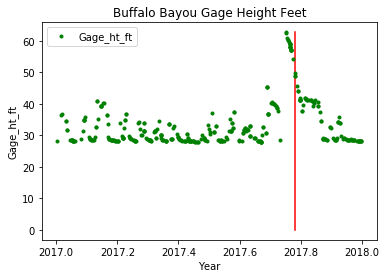

In [22]:
plt.plot([2017 + 8/12+30/265 for i in range(2)],
         [0, np.max(bay_data_buff_bayou.loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) &
                                            (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]['Gage_ht_ft'])],
         linestyle = '-', color = 'r')
plt.plot(bay_data_buff_bayou.loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
                                 (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]['Decimal_Date'],
         (bay_data_buff_bayou
          .loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
               (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]
          ['Gage_ht_ft']),
        linestyle = 'None', marker = '.', color = 'g',
        label = 'Hurricane Harvey')
plt.xlabel('Year')
plt.ylabel('Gage_ht_ft')
plt.title('Buffalo Bayou Gage Height Feet')
plt.legend()
plt.show()

Salinity and gauge data both correlate with Hurricane Harvey.
<br>Crossplot those features.

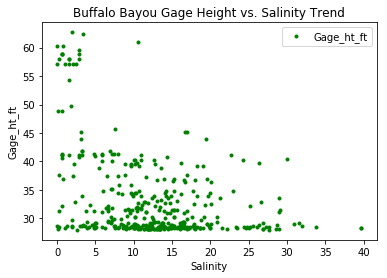

In [23]:
plt.plot((bay_data_buff_bayou.loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
                                  (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]
          ['Salinity (ppt)']),
         (bay_data_buff_bayou
          .loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
               (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]
          ['Gage_ht_ft']),
        linestyle = 'None', marker = '.', color = 'g')
plt.xlabel('Salinity')
plt.ylabel('Gage_ht_ft')
plt.title('Buffalo Bayou Gage Height vs. Salinity Trend')
plt.legend()
plt.show()

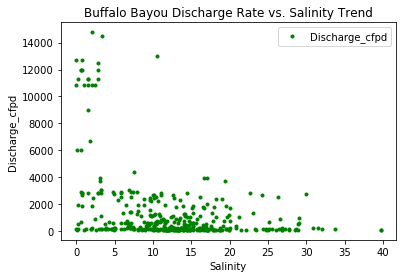

In [24]:
plt.plot((bay_data_buff_bayou.loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
                                  (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]
          ['Salinity (ppt)']),
         (bay_data_buff_bayou
          .loc[(bay_data_buff_bayou['Decimal_Date'] >= 2017.0) & 
               (bay_data_buff_bayou['Decimal_Date'] < 2018.0)]
          ['Discharge_cfpd']),
        linestyle = 'None', marker = '.', color = 'g')
plt.xlabel('Salinity')
plt.ylabel('Discharge_cfpd')
plt.title('Buffalo Bayou Discharge Rate vs. Salinity Trend')
plt.legend()
plt.show()

Not all, but some Galveston Bay sampling areas correlate to buffalo bayou discharge rates.
<br>Identify sampling locations where data correlate:

In [29]:
sorted(bay_data_buff_bayou.loc[(bay_data_buff_bayou['Gage_ht_ft'] > 55) & 
                               (bay_data_buff_bayou['Salinity (ppt)'] < 5)]['Area'].unique())

['Clear Lake at 18 Waterford Oak Lane',
 'Clear Lake at Blue Dolphin Yachting Center',
 'Clear Lake at Clear Lake Park Pier',
 'Clear Lake at Lakewood Yacht Club',
 'Clear Lake at Nassau Bay Upper Bay Road',
 'Clear Lake at Sea Cove Ct',
 'Clear Lake at South Shore Harbor',
 'Clear Lake at Taylor Lake Entrance and Nasa Road',
 'Clear Lake at Waterford Harbor Marina',
 'Clear Lake at Watergate Yachting Center',
 'Galveston Bay at 1109 6th St. San Leon',
 'Galveston Bay at 3903 Bayshore Bacliff',
 'Galveston Bay at Pine Gully Park',
 'Galveston Bay at Seascape Pier',
 'Galveston Bay at Shoreacres Pier',
 'Galveston Bay at Todville Road',
 'Galveston Bay at Topwater Grill',
 'Moses Lake at Texas City Prairie Preserve']

List of correlating locations (and Buffalo Bayou gauge location) on google maps:
<br>https://goo.gl/maps/EqNykH7SuF6UE5yC6